<img src="../Images/exchangeflow.jpg" align="right" style="width: 500px;">

# Estuarine Circulation

In an estuary freshwater input from land and salt water input from the ocean setup a salinity gradient that drives a residual circulation, with saltier water flowing into the estuary at the bottom and fresher water flowing out of the estuary at the surface

Here you will examine velocity as a function of depth and time to see how tides and salinity gradients influence this residual circulation. In the following steps you will

* Load model data
* Examine velocities and see how average allows insight into the circulation pattern
* Compare to tidal water levels to observe differences in Neap and Spring tides
* Compare with salinity profiles to determine the influence of 
stratification.

Below, the initial analysis is started, fill in where directions indicate.

In [ ]:
# First we import the packages we want to use, note we must install netcdf4
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os

In [4]:
# set the location of our data
data_fol = '../Datasets'

# Uncomment and adjust as neccssary to work with Google drive
#!pip install netcdf4
#from google.colab import drive
#import os
#drive.mount('/content/drive')
#os.chdir('/content/drive/My Drive/YourWorkingFolder')
#data_fol = ''

In [19]:
# Loading and pre-processing model predictions from south Admiratly Inlet

# Choose a location to load
fname = 'admiralty.nc'

# Now use xarray to open the netcdf dataset
ds = xr.open_dataset(data_fol + '/' + fname)

# We are going to transpose two variables so that plots show time on x-axis
ds = ds.transpose('s_rho', 'ocean_time', 's_w', 'scalar')

# We will also set the s_rho dimension, which is the model layer, to the mean depth.
#  this will make it more intuitive we examine the modeled variables
ds['s_rho']=ds['z_rho'].mean(dim='ocean_time')
ds['s_rho'].attrs = {'long_name': 'Elevation', 'units': 'm'}

First let us plot the velocities. They are save in two variables, one for velocity northward, v, and one for velocity eastward, u. We will plot these velocities as a function of depth (y-axis) and time (x-axis) for a single month in summer.

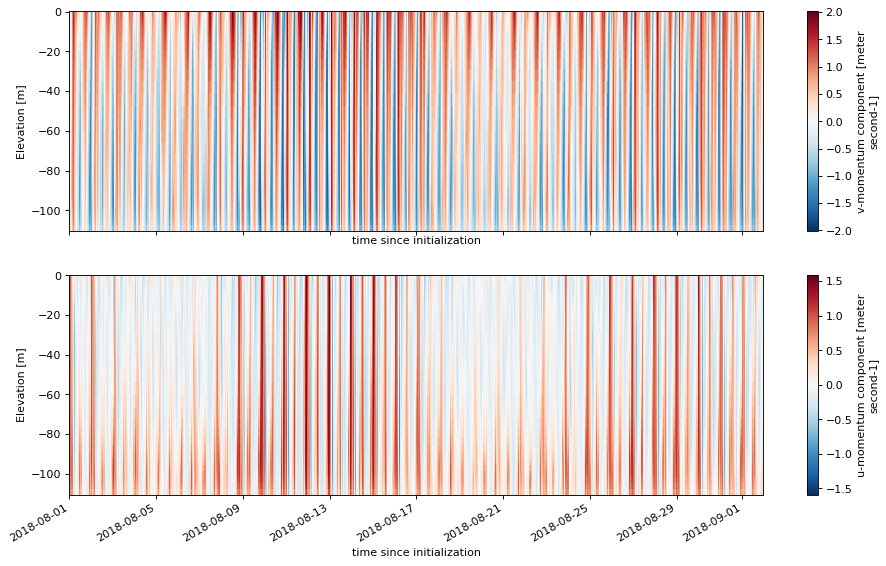

In [29]:
# In summer-time tides will have a larger influence, so plotting summer below.
# Note, red is velocity northward, blue is velocity southward
sdate = '2018-08-01'
edate = '2018-09-01'
v_sum = ds['v'].sel(ocean_time=slice(sdate,edate))
u_sum = ds['u'].sel(ocean_time=slice(sdate,edate))


f = plt.figure(num=None, figsize=(14,8), dpi=80, facecolor='w', edgecolor='k')
(ax1, ax2) = f.subplots(2, 1, sharex=True)
plt.sca(ax1)
v_sum.plot()
plt.sca(ax2)
u_sum.plot()

Looking at the plot above you see many stripes of red and blue, indicating the water flowing in and out on each tide during the month. The velocities are stronger in the north-south directions (notice the color-scale limits) because admiralty inlet is primarily orientied in the the north-south direction. 

What you don't see here is the pattern we were expecting, of surface waters flowing out (northward, red) and bottom waters flowing to the estuary (southward, blue). This is because the tidal action is much stronger than the residual flow. We need to do some averaging in time to get a better idea of what is happening on over the long-term mean.

To do this we create an averaging function below that use some filtering methods to remove the tidal signal.

In [ ]:
# filter out the tidal fluxes and estimate the exchange flow, and then see if you can identify an pattern of exchange flow strength with Spring and Neap tidal cycles. Here you will
# To average out the tides we will use a filter defined below
# The details are not important, but just know this will remove the high frequency tidal motions, leaving residual flow
# Below we define a function to do the filtering
import numpy as np
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

No let us apply this averaging filter, butter_lowpass_filter to the velocities we plotted above in the north-south direction (v)

In [21]:
# We will filter each model depth layer in a loop and construct a new fitlered variable, v_f
v_f = np.zeros(ds['u'].data.shape)
for i in range(ds['s_rho'].data.size):
  v_f[i,:] = butter_lowpass_filter(ds['v'].isel(s_rho=i).data,1/80,1,2)

ds['v_f'] = (['s_rho','ocean_time'],v_f) #New filtered variable
ds['v_f'].attrs = {'long_name': 'Residual Velocity', 'units': 'm/s'}

Now do we see what we were expecting?

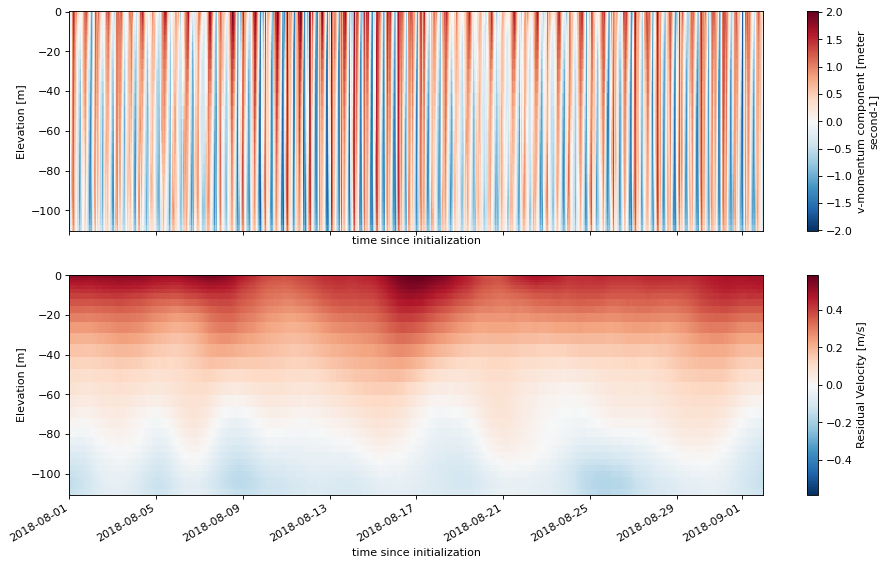

In [32]:
# Plotting the original and averaged velocity
v_sum = ds['v'].sel(ocean_time=slice(sdate,edate))
v_f_sum = ds['v_f'].sel(ocean_time=slice(sdate,edate))

f = plt.figure(num=None, figsize=(14,8), dpi=80, facecolor='w', edgecolor='k')
(ax1, ax2) = f.subplots(2, 1, sharex=True)
plt.sca(ax1)
v_sum.plot()
plt.sca(ax2)
v_f_sum.plot()

### Step 1

Below, add code below to add zeta in the second panel. zeta is the free-surface, which is the tidal water level. zeta is a variable in your ds dataset. Note the addition of add_colorbar=False to the plotting command. Without this addition the x-axes won't line up.

(2pts)

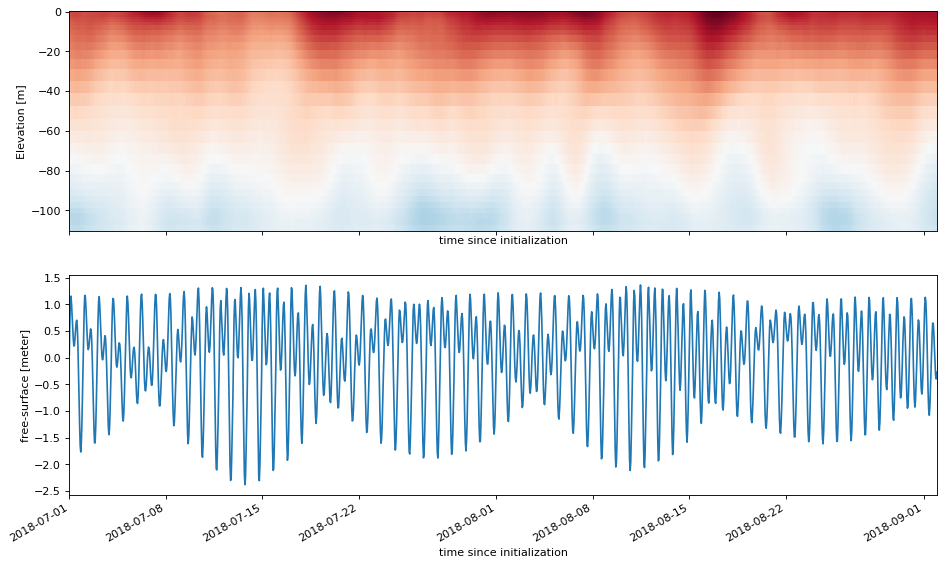

In [23]:
f = plt.figure(num=None, figsize=(14,8), dpi=80, facecolor='w', edgecolor='k')
(ax1, ax2) = f.subplots(2, 1, sharex=True)
plt.sca(ax1)
v_f_sum.plot(add_colorbar=False) # Note, removes colorbar to axes line up
plt.sca(ax2)
# your code here
zeta_sum.plot()


### Step 2

Below write code to make a 2-panel plot of residual velocity (v_f) and salinity (salt). Remember to use add_colorbar=False. Is there a relation between stratification and residual exchange flow?

(6pts)

In [0]:
# Notes, use the above code as a guide



### Step 3

Make a 3-panel plot of tidal fluctuations (zeta), nitrate (NO3), and phytoplankton during the summer (July-August, as above). How do the Spring-Neap tidal cycles impact nitrate distributions and phytoplankton.

(6pts)

### Step 4

Examine the relationship between stratification, tidal fluctuations, and exchange flow at Hood Canal South. Make a 3-panel plot of residual velocity, salinity, and tidal fluctuations. How does the relationship between exchange velocity (v_f) and tidal fluctuations (zeta) compare between Admirately Inlet and Hood Canal? What differences or similarities do you see between two sites in relation to salinity structure and NO3 concentrations

(6pts)

### An aside
Note that we are using the 'v' velocity, or the northward velocity. In both these cases the estuary is orientated predominantly towards the north, however in general, for such an analysis you need to first rotate into the principle flow direction using PCA. For our purproses, 'v', is sufficient